In [125]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler , LabelEncoder
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [2]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


<Axes: >

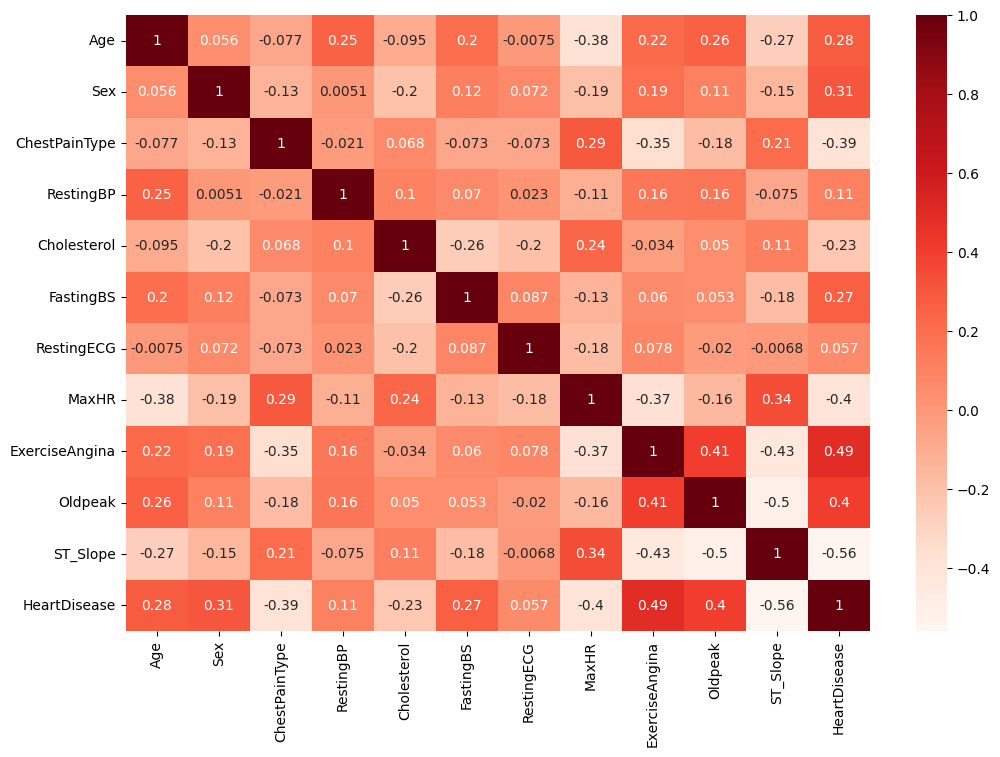

In [141]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr() , annot=True , cmap='Reds')

<Axes: xlabel='HeartDisease'>

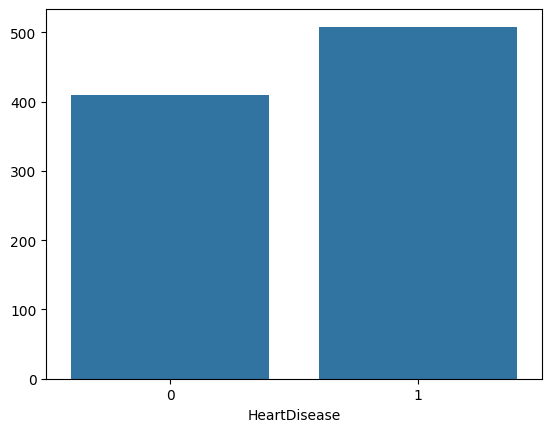

In [96]:
vc = df['HeartDisease'].value_counts()
sns.barplot(x=vc.index , y=vc.values)

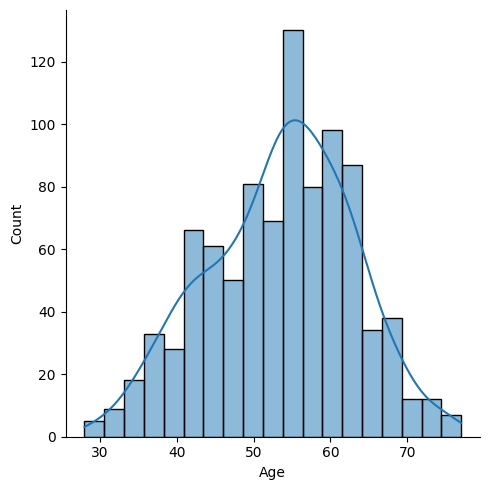

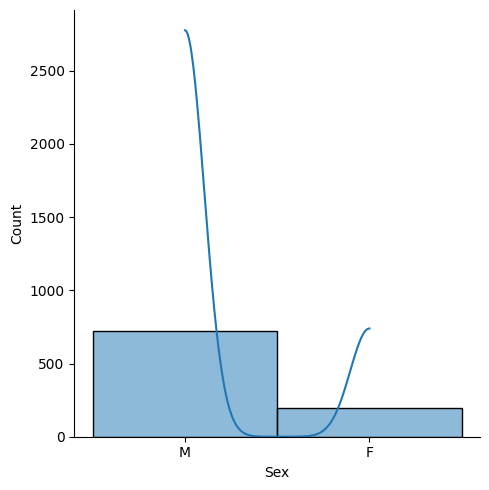

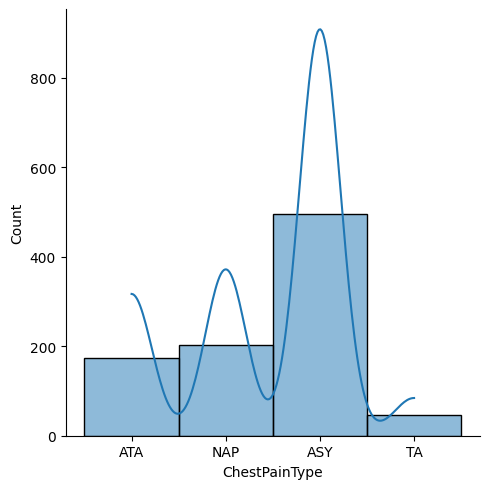

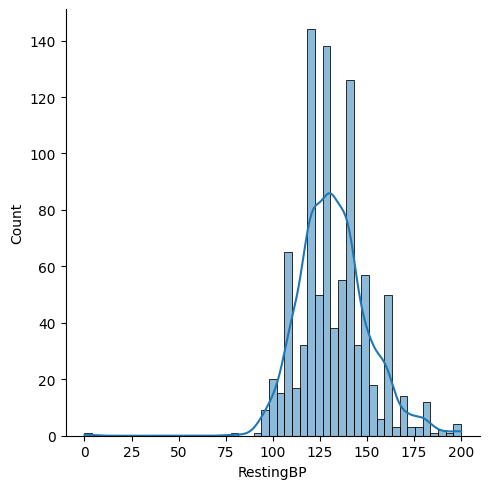

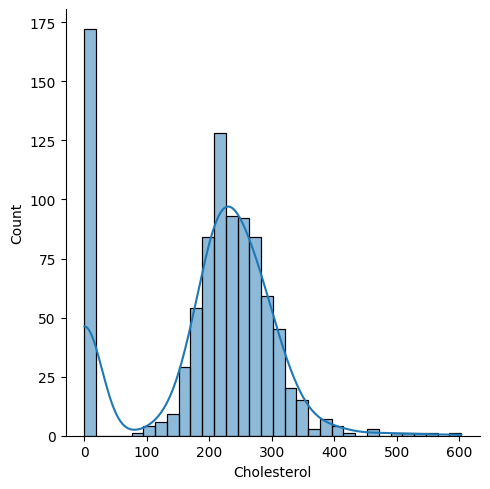

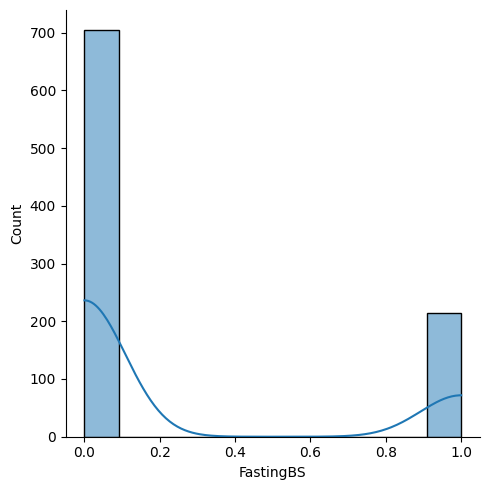

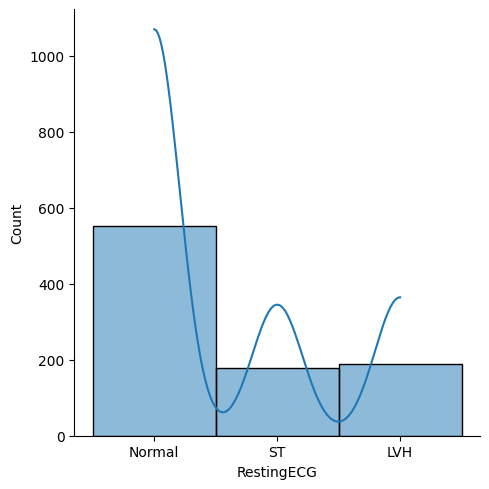

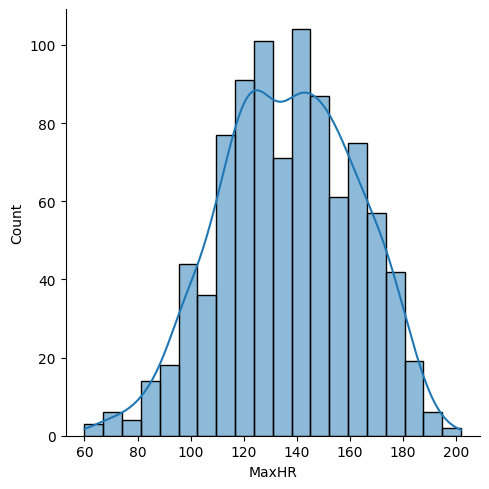

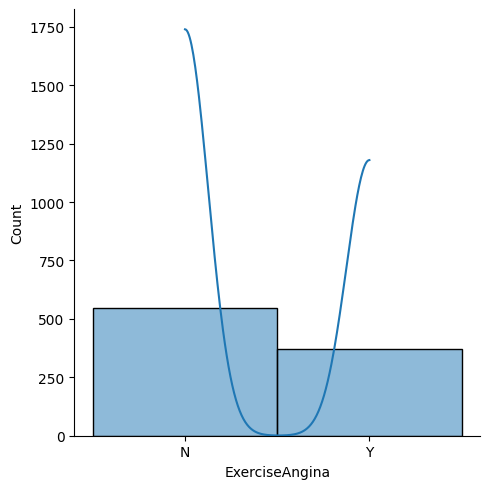

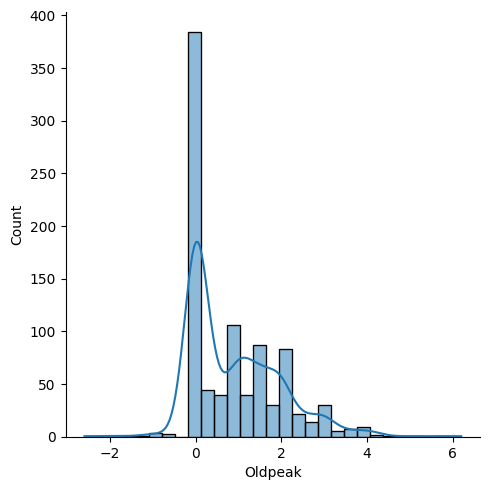

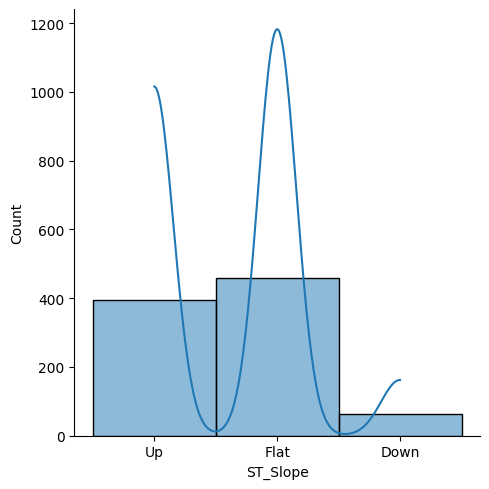

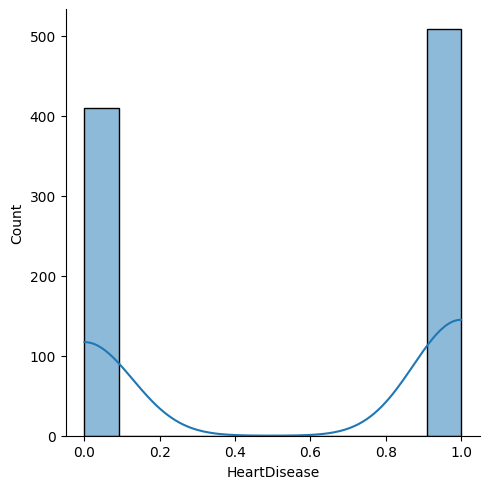

In [6]:
columens = df.columns.tolist()
for col in columens:
    sns.displot(df[col] , kde=True)

In [13]:
encoder = LabelEncoder()
columens = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

for col in columens:
    df[col] = encoder.fit_transform(df[col])
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [17]:
X = df.drop('HeartDisease' , axis=1)
y = df['HeartDisease']


array([1, 0])

In [21]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [32]:
stander = StandardScaler()
X_train_scaled = stander.fit_transform(X_train)
X_test_scaled = stander.transform(X_test)

In [128]:
MODELS = []
NAMES = [
    "Logistic Regression",
    "Random Forest",
    "KNN",
    "Decision Tree",
    "SVM"
]

CLASSIFIERS = [
    LogisticRegression(),
    RandomForestClassifier(n_estimators=3, random_state=42),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(max_depth=3),
    SVC(kernel="linear", random_state=42)
]

train_preds = []
test_preds = []

for clf, name in zip(CLASSIFIERS, NAMES):
    clf.fit(X_train_scaled, y_train)
    y_train_pred = clf.predict(X_train_scaled)
    y_test_pred = clf.predict(X_test_scaled)
    train_preds.append(y_train_pred)
    test_preds.append(y_test_pred)
    recall = recall_score(y_test, y_test_pred, average="macro")
    MODELS.append(recall)
    print(f"{name}: Recall = {recall:.4f}")

Logistic Regression: Recall = 0.8528
Random Forest: Recall = 0.7894
KNN: Recall = 0.8388
Decision Tree: Recall = 0.8491
SVM: Recall = 0.8398


In [129]:
best_model_index = MODELS.index(max(MODELS))
print("\nBest model is:", NAMES[best_model_index], "with Recall:", MODELS[best_model_index])



Best model is: Logistic Regression with Recall: 0.8527733948294696


In [130]:
best_model_index = MODELS.index(max(MODELS))
y_train_pred = train_preds[best_model_index]
y_test_pred = test_preds[best_model_index]

In [131]:
cm = confusion_matrix(y_train , y_train_pred)

<Axes: >

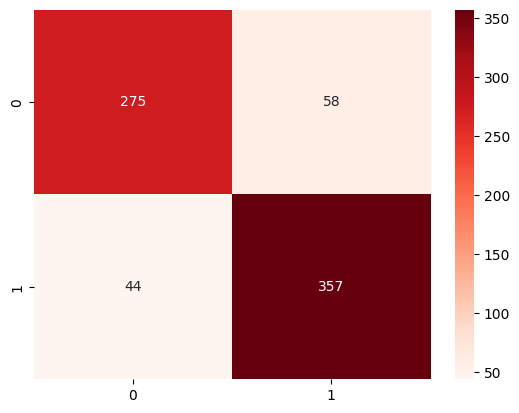

In [132]:
sns.heatmap(cm , annot=True , fmt='d' , cmap='Reds')

In [134]:
print(classification_report(y_train , y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84       333
           1       0.86      0.89      0.88       401

    accuracy                           0.86       734
   macro avg       0.86      0.86      0.86       734
weighted avg       0.86      0.86      0.86       734



In [133]:
print(classification_report(y_test , y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

